# One Hot Representation
***
A one hot representation of some corpus of text is basically a count based representation of the presence of certain words in a given corpus of text. Each word in your corpus gets a unit basis vector in this representation. The full representation of a given corpus of text is then the linear combination of the basis vectors, multiplied by the count of occurrence of each word.

This representation just checks for existence and doesn't retain information about the counts.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

One-hot representation:


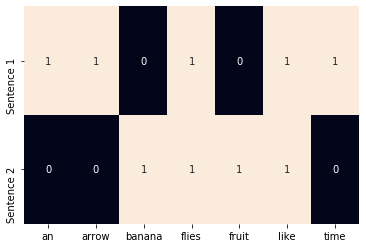

In [20]:
text = ["Time flies flies like an arrow.","Fruit flies like a banana."]
one_hot_vectorizer = CountVectorizer(binary=True) # binary=True makes it one-hot instead of TF
one_hot = one_hot_vectorizer.fit_transform(text).toarray() # fit_transform yields just a sparse matrix
print("One-hot representation:")
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=one_hot_vectorizer.get_feature_names(),\
           yticklabels=['Sentence 1','Sentence 2'])
plt.show()

# Term Frequency (TF) Representation
***
The TF representation of a corpus of text is the vector sum of the one hot representations of its constituent words.

Term-Frequency representation:


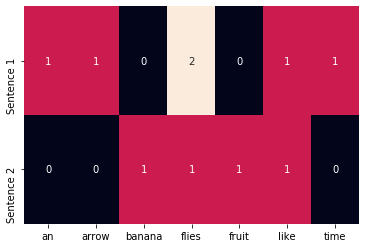

In [19]:
text = ["Time flies flies like an arrow.","Fruit flies like a banana."]
one_hot_vectorizer = CountVectorizer()
one_hot = one_hot_vectorizer.fit_transform(text).toarray() # fit_transform yields just a sparse matrix
print("Term-Frequency representation:")
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=one_hot_vectorizer.get_feature_names(),\
           yticklabels=['Sentence 1','Sentence 2'])
plt.show()

# TF-IDF Representation
***
The Term-Frequency representation is proportional to the frequency of the words encountered in a corpus. However, we might want to penalize the importance of certain words if they occur in multiple documents, as this means that particular word has no resolving power in terms of differentiating between documents.

The IDF of a particular token (word) is given by:
$$\textrm{IDF}(w)=\log\left(\frac{N}{n_w}\right)$$

Where $N$ is the total number of documents, and $n_w$ is the number of documents in which the token $w$ appears. 

The final representation for a given token in a set of documents is the product of the $\textrm{TF}(w)$ and the $\textrm{IDF}(w)$. 

If there is a maximally common word ($n_w=N$), then the IDF evaluates to 0 because the $\log$ of 1 is 0. 

This is the maximum penalty for a given word. 

Term-Frequency Inverse Document Frequency representation:


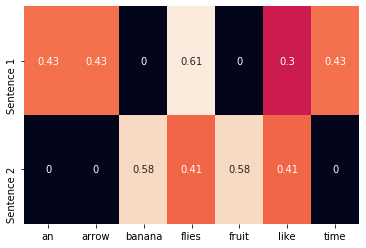

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform( text ).toarray()
print("Term-Frequency Inverse Document Frequency representation:")
sns.heatmap( tfidf, annot=True, cbar=False, xticklabels=one_hot_vectorizer.get_feature_names(),\
           yticklabels = ['Sentence 1','Sentence 2'])
plt.show()

# Tokenization
***
Tokenization is the process of breaking text down into tokens. For example, tokenizing tweets is a non-trivial process since we need to preserve hashtags, @handles and emojis, etc. 

Two common packages used for tokenizing text are `nltk` and `spacy`.

In [22]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Mary, don't slap the green witch"
print( [str(token) for token in nlp(text.lower())] )

['mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']


In [23]:
from nltk.tokenize import TweetTokenizer
tweet = u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:-)"
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':-)']


# N-Grams
***
A N-gram is a fixed length sequence of consecutive tokens. So all bigrams are the set of pairs of consecutive words.

In [24]:
def n_grams( text, n ):
    return [text[i:i+n] for i in range(len(text) - n+1)]

In [26]:
tokens = ['mary', ',', "n't", 'slap','green','witch','.']
print(n_grams(tokens,3))

[['mary', ',', "n't"], [',', "n't", 'slap'], ["n't", 'slap', 'green'], ['slap', 'green', 'witch'], ['green', 'witch', '.']]


# Lemmatization
***
Lemmas are the root forms of words. If you consider the inflections of fly - flow,flew,flies, flown, and flowing, one understands that the lemma for these words is fly. 

Lemmatization is used to reduce tokens to their lemmas to reduce the dimensionality of the vector representation.

Stemming is just the poor-mans lemmatization. Stemming involves using handcrafted rules to strip the endings of words to reduce them to the common form called stems. 

In [27]:
doc = nlp(u"he was running late")
for token in doc:
    print("{} --> {}".format(token,token.lemma_))

he --> -PRON-
was --> be
running --> run
late --> late


# Parts of Speech Tagging
***
Tag each token with its corresponding part of speech. 

In [29]:
doc = nlp(u"Mary slapped the green witch")
for token in doc:
    print("{} --> {}".format(token,token.pos_))

Mary --> PROPN
slapped --> VERB
the --> DET
green --> ADJ
witch --> NOUN


# Chunking and Named Entity Recognition
***
We can perform chunking (a.k.a shallow parsing) in order to create contiguous multitoken boundaries and work with higher order units composed of grammatical atoms. 

Here is an example of Noun Phrases

In [30]:
for chunk in doc.noun_chunks:
    print("{} - {}".format(chunk, chunk.label_))

Mary - NP
the green witch - NP
